## Izmir green space analysis with OSM data Step-2
In this notebook, the existing neighbourhood shapefile will be examined and be prepared for the step-3, where it will be spatially joined with the green areas data. 
The neighbourhood boundaries data contains neighbourhoods from other cities, not only Izmir. Also the dataset has the borough ID ("ILCEID") but  does not contain the borough names. 
Based on this examination;
* There will be filtering out of the neighbourhoods that are not placed within Izmir boundary.
* Then,the ILCEID codes will be manually matched with their corresponding borough names.
* After that, borough-level shapefile will be generated from the neighbourhood dataset.

In [1]:
import geopandas as gpd

In [2]:
gdf_mahalle = gpd.read_file("IZMIR_MAH.shp")

In [3]:
gdf_mahalle.head(2)

,OBJECTID,ID,AD,ILCEID,TIP,SHAPE_Leng,SHAPE_Area,geometry
0,1,17032,Ovapınarı,1957,Kırsal Mahalle,0.297726,0.003541,"POLYGON ((27.84937 37.52796, 27.84950 37.52812..."
1,2,17357,Yalınkuyu,1542,Kırsal Mahalle,0.153390,0.000510,"POLYGON ((28.39859 37.95343, 28.39871 37.95344..."


In [4]:
gdf_mahalle.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    4290 non-null   int64   
 1   ID          4290 non-null   int64   
 2   AD          4290 non-null   object  
 3   ILCEID      4290 non-null   int64   
 4   TIP         4290 non-null   object  
 5   SHAPE_Leng  4290 non-null   float64 
 6   SHAPE_Area  4290 non-null   float64 
 7   geometry    4290 non-null   geometry
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 268.3+ KB


### NOTE
The dataset has been examined in QGIS, and it is observed that there are neighbourhood boundaries from districts outside of Izmir. Therefore, the outside neighbourhoods will be removed, reatining only those located within the Izmir boundaries. 

This observation has been done in QGIS, by overlaying Google Maps imagery with neighbourhood dataset. By using ILCEID for labeling, neighbourhoods located within the Izmir boundaries identified.

### Data Filtering
Retain only the neighbourhoods located within the Izmir boundaries and remove others.

In [5]:
izmir_ilce_list = [1448, 1819, 2009, 2006, 2056, 2007, 1203, 1521, 1334, 1128, 1280, 1181, 1467, 1461, 1682, 1612, 1826, 1611, 2018, 2013, 1703, 1432, 1251, 1677, 1178, 1563, 1176, 1477, 2057, 1780]

In [6]:
gdf_mahalle_filtered = gdf_mahalle[gdf_mahalle["ILCEID"].isin(izmir_ilce_list)]

### Generating Borough Names
At this stage, a new column for borough names will be genrated by manually matching the "ILCEID" codes to their corresponding  names.

In [7]:
ilce_dict = {
    1448: "KARSIYAKA",1819: "KONAK",2009: "GAZIEMIR",2006: "BALCOVA", 2056: "BAYRAKLI", 2007: "CIGLI", 1203: "BORNOVA", 1521: "MENEMEN", 1334: "FOCA",
    1128: "ALIAGA", 1280: "DIKILI", 1181: "BERGAMA", 1467:"KINIK", 1461:"KEMALPASA", 1682: "TORBALI", 1612:"SELCUK", 1826: "MENDERES", 1611: "SEFERIHISAR", 2018:"GUZELBAHCE", 2013: "NARLIDERE", 1703: "URLA", 1432: "KARABURUN", 1251: "CESME", 1677: "TIRE", 1178:"BAYINDIR", 1563: "ODEMIS", 1176: "BEYDAG", 1477: "KIRAZ", 2057: "KARABAGLAR", 1780: "BUCA"
}

In [8]:
gdf_mahalle_filtered = gdf_mahalle_filtered.copy()

In [9]:
gdf_mahalle_filtered["ILCE_ADI"] = gdf_mahalle_filtered["ILCEID"].map(ilce_dict)


In [10]:
gdf_mahalle_filtered.head(2)

,OBJECTID,ID,AD,ILCEID,TIP,SHAPE_Leng,SHAPE_Area,geometry,ILCE_ADI
1836,1837,35455,İhsaniye,1611,Kırsal Mahalle,0.082731,0.000216,"POLYGON ((26.78859 38.28193, 26.79171 38.28251...",SEFERIHISAR
1837,1838,35632,Bademler,1703,Kırsal Mahalle,0.221304,0.001508,"POLYGON ((26.82327 38.28687, 26.82340 38.28694...",URLA


In [11]:
gdf_mahalle_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1336 entries, 1836 to 3196
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1336 non-null   int64   
 1   ID          1336 non-null   int64   
 2   AD          1336 non-null   object  
 3   ILCEID      1336 non-null   int64   
 4   TIP         1336 non-null   object  
 5   SHAPE_Leng  1336 non-null   float64 
 6   SHAPE_Area  1336 non-null   float64 
 7   geometry    1336 non-null   geometry
 8   ILCE_ADI    1336 non-null   object  
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 104.4+ KB


### Creating Borough Geometries
Borough-level geometries will be generated by dissolving the neighbourhood boundaries based on the "ILCE_ADI".  


In [12]:
gdf_ilce = gdf_mahalle_filtered.dissolve(by="ILCE_ADI", as_index=False)

In [13]:
gdf_ilce.head(2)

,ILCE_ADI,geometry,OBJECTID,ID,AD,ILCEID,TIP,SHAPE_Leng,SHAPE_Area
0,ALIAGA,"MULTIPOLYGON (((27.02683 38.69684, 27.02668 38...",2043,34284,Aşağışakran,1128,Kırsal Mahalle,0.131118,0.000878
1,BALCOVA,"POLYGON ((27.07063 38.38425, 27.07172 38.38293...",2684,34326,Korutürk,2006,Mahalle,0.067043,0.000128


In [14]:
gdf_ilce.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ILCE_ADI    29 non-null     object  
 1   geometry    29 non-null     geometry
 2   OBJECTID    29 non-null     int64   
 3   ID          29 non-null     int64   
 4   AD          29 non-null     object  
 5   ILCEID      29 non-null     int64   
 6   TIP         29 non-null     object  
 7   SHAPE_Leng  29 non-null     float64 
 8   SHAPE_Area  29 non-null     float64 
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 2.2+ KB


In [15]:
gdf_mahalle_filtered.to_file("izmir_neighbourhood.shp", driver="ESRI Shapefile")

In [16]:
gdf_ilce.to_file("izmir_borough.shp", driver="ESRI Shapefile")

In [17]:
import matplotlib.pyplot as plt

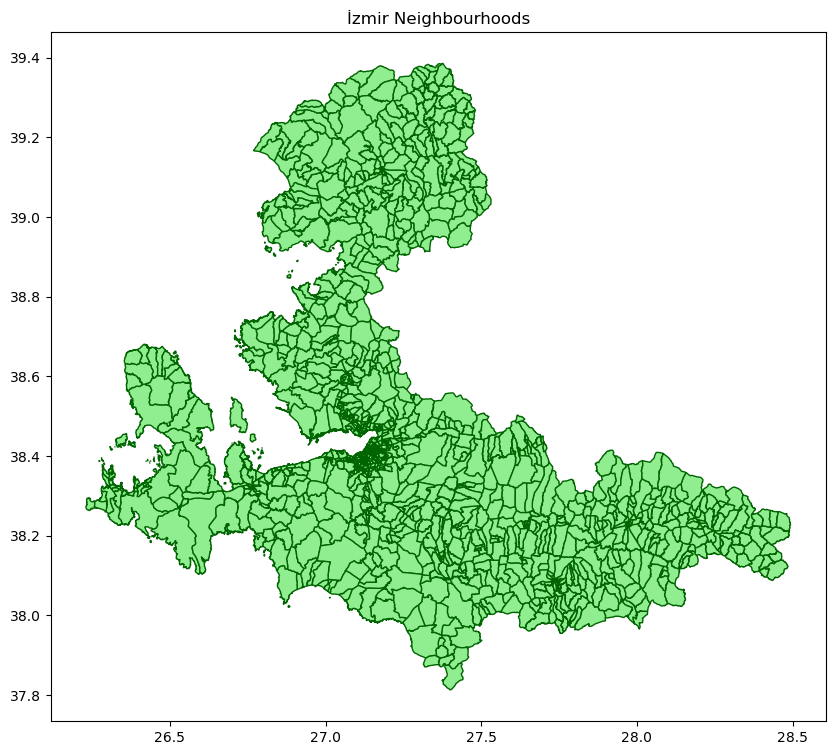

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_mahalle_filtered.plot(
    ax=ax, 
    color="lightgreen",   # polygon rengi
    edgecolor="darkgreen" # sınır rengi
)
ax.set_title("İzmir Neighbourhoods")
plt.show()

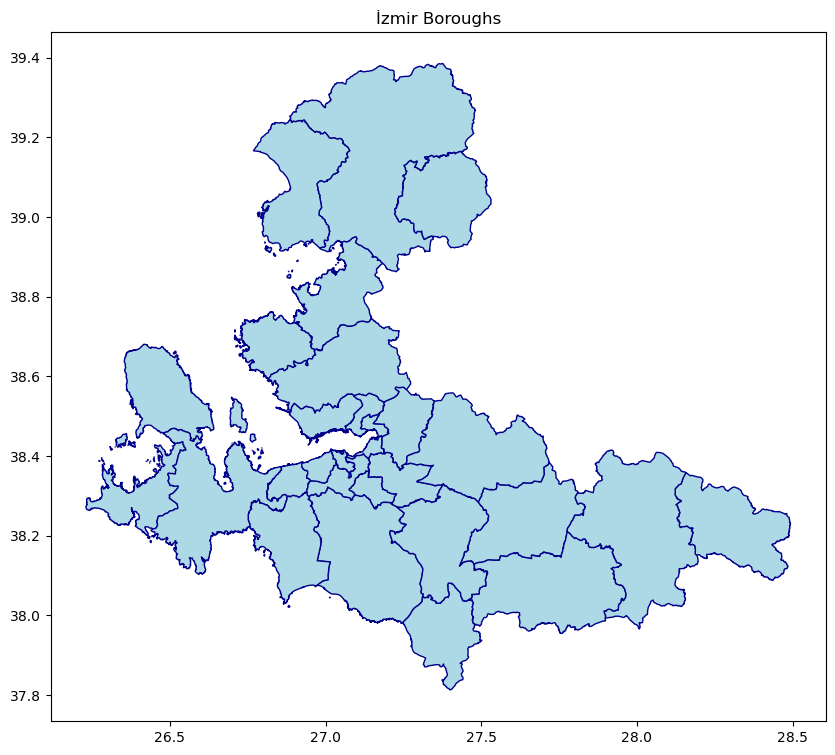

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ilce.plot(
    ax=ax, 
    color="lightblue",
    edgecolor="darkblue"
)
ax.set_title("İzmir Boroughs")
plt.show()

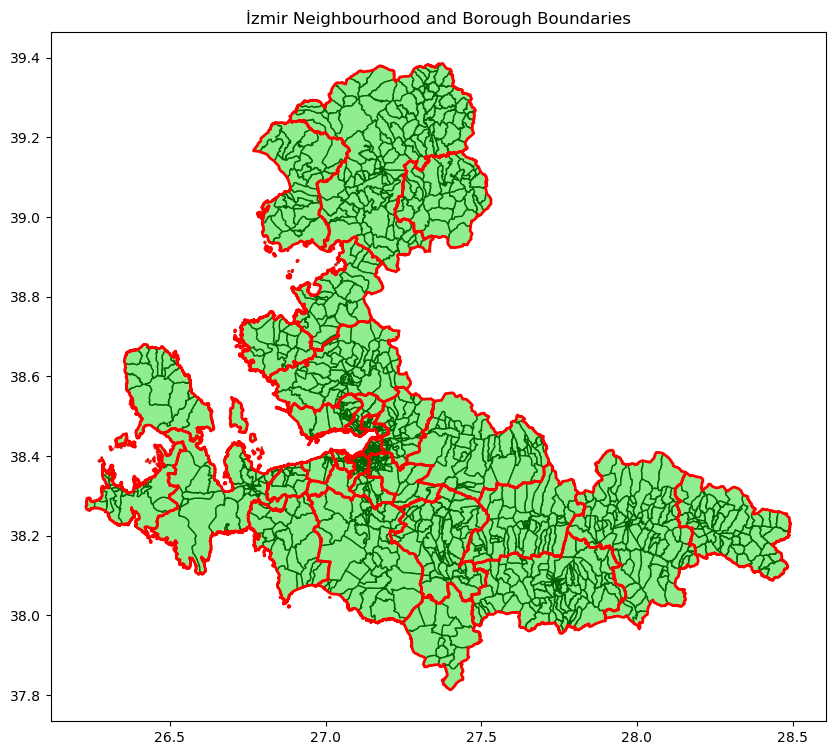

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_mahalle_filtered.plot(ax=ax, color="lightgreen", edgecolor="darkgreen")
gdf_ilce.plot(ax=ax, color="none", edgecolor="red", linewidth=2)  # İlçe sınırlarını kırmızı ile göster
ax.set_title("İzmir Neighbourhood and Borough Boundaries")
plt.show()

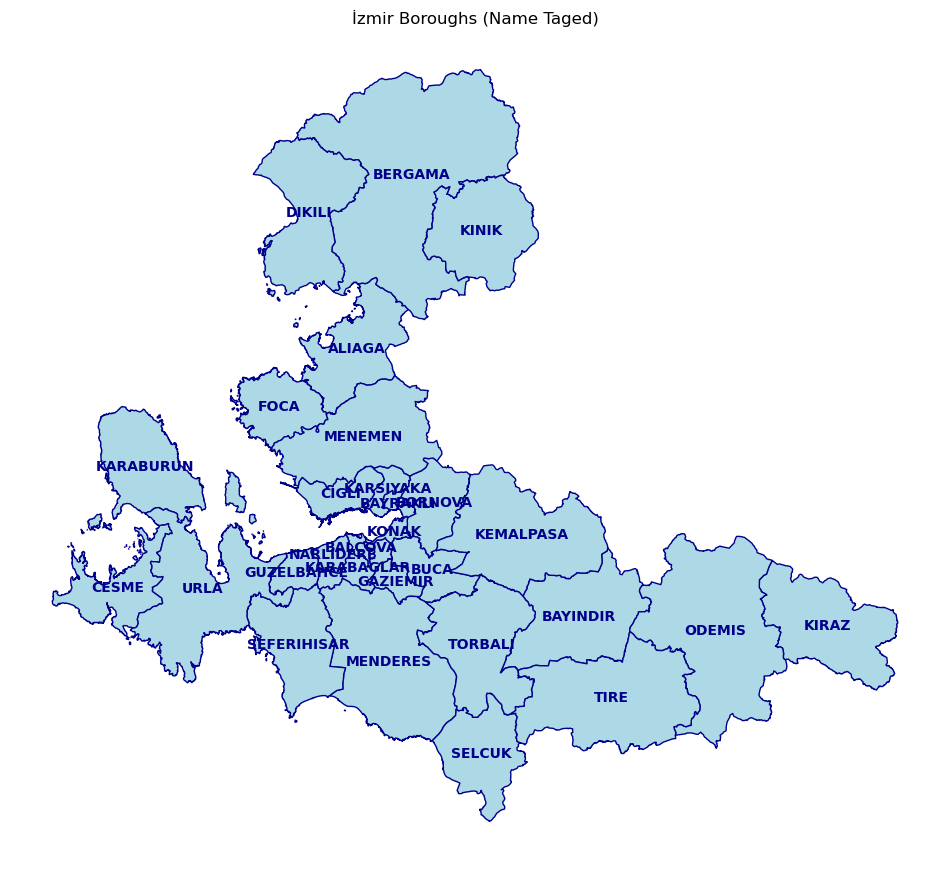

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))

# İlçe polygonları
gdf_ilce.plot(
    ax=ax,
    color="lightblue",
    edgecolor="darkblue"
)

# İlçe isimlerini polygon merkezine yerleştir
for idx, row in gdf_ilce.iterrows():
    plt.text(
        x=row.geometry.centroid.x,    # x koordinatı
        y=row.geometry.centroid.y,    # y koordinatı
        s=row["ILCE_ADI"],            # ilçe adı
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='darkblue'
    )

ax.set_title("İzmir Boroughs (Name Taged)")
plt.axis('off')
plt.show()

### Outcome
The neighbourhood and borough datasets are now clean, properly labeled, and contain accurate geometries. These datasets are ready to be spatially joined with the OSM green areas data in Step-3.